# House Price Regression Analysis 
- Purpose of this project is to gain knowledge and experience related to implementing Regression models in ML 
- The dataset describes the sale of individual residential properties in Ames, Iowa from 2006 to 2010
- Data Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns

In [2]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Notebooks


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('../Data/Raw/train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Profiling

- Gather a basic understanding of the data (dimensions, data types, nulls, etc.) 

In [6]:
df.shape

(1460, 81)

In [7]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [8]:
cols = df.columns

In [9]:
# Percent of NULL values
nullVals = df.isnull().sum()*100/len(df)
nullVals = nullVals.where(nullVals != 0).dropna()

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nullVals)
    print(f"Attributes Containing Nulls: {len(nullVals)}")

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
Attributes Containing Nulls: 19


In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Investigate unique values for different attributes to get a better idea of the data 
# The attributes selected to be investigated are based on personal gaps in knowledge of the attributes
# Based on the link provided in the Summary below to the attribute documentation

rand_cols = ['MSSubClass', 'MSZoning', 'Street','Alley', 'LotShape','LandContour', 'Utilities', 'LotConfig',
             'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofMatl', 'Exterior1st', 
             'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir',
             'Electrical','KitchenQual', 'Functional', 'FireplaceQu','GarageType', 'GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

for rand_col in rand_cols:
    print(f"{rand_col}: {df[rand_col].unique()}\n")

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street: ['Pave' 'Grvl']

Alley: [nan 'Grvl' 'Pave']

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']

Utilities: ['AllPub' 'NoSeWa']

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

Exterior1st: ['VinylS

### Summary

- There are **1460 rows & 81 columns** 
- From documentation by Dean De Cock: **23 nominal, 23 ordinal, 14 discrete, and 20 continuous**
    - Documentation Link: http://jse.amstat.org/v19n3/decock.pdf
- There are **19 Attribtues with NULL values** 
    - Attributes with the **most NULLs are: Alley, FirePlaceQu, PoolQC, Fence, MiscFeature**
- **SalesPrice** is our target feature that we are trying to predict

**Attribtues**: Descriptions of attributes that may not be self-explanatory. The link below contains short descriptions of the attribute to help better understand the data
- Link to attribute descriptions https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf


# EDA - Exploratory Data Analysis

- Perform analysis on the data to determine any key trends or patterns

## Target Variable --> *Sale Price* <--

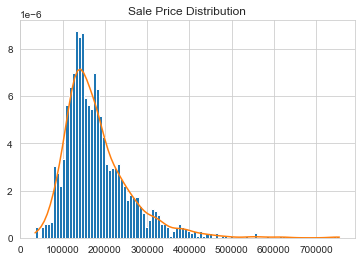

In [95]:
# Plot Sale Price 
n, x, _ = plt.hist(df['SalePrice'], bins = 100, density=True)
density = stats.gaussian_kde(df['SalePrice'])
plt.title('Sale Price Distribution')
plt.plot(x, density(x))
plt.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\saleprice_distribution.png")
plt.show()

In [14]:
# Summary stats
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Skewness:** Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.<br>
**Kurtosis:** Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

*Links:* https://brownmath.com/stat/shape.htm , https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

In [15]:
sale_kurt = df['SalePrice'].kurt()
sale_skew = df['SalePrice'].skew()
print(f"Sale Price Skewness: {sale_skew}\nSale Price Kurtosis: {sale_kurt}")

Sale Price Skewness: 1.8828757597682129
Sale Price Kurtosis: 6.536281860064529


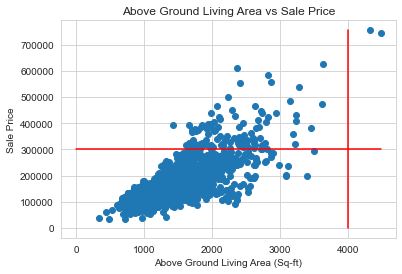

In [97]:
# Explore Outliers
# The documentation recommends removing any houses with more than 4000 square feet from the data set
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.plot([4000, 4000],[0, max(df['SalePrice'])], color='red')
plt.plot([0, max(df['GrLivArea'])], [300000,300000], color='red')
plt.title('Above Ground Living Area vs Sale Price')
plt.xlabel('Above Ground Living Area (Sq-ft)')
plt.ylabel('Sale Price')
plt.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\livingarea_outliers.png")
plt.show()

In [17]:
# Look at the details about the outlier data 
df_outlier = df[df['GrLivArea'] > 4000]
df_outlier.reset_index(drop=True,inplace=True)
df_outlier.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
2,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
3,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [18]:
# Drop the sales where Above ground living area is > 4000 and Sale Price is less than $300 000
df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)].index, inplace=True)

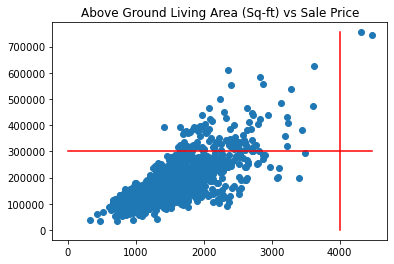

In [19]:
# Re-plot the data to confirm that the data has been dropped
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.plot([4000, 4000],[0, max(df['SalePrice'])], color='red')
plt.plot([0, max(df['GrLivArea'])], [300000,300000], color='red')
plt.title('Above Ground Living Area (Sq-ft) vs Sale Price')
plt.show()

In [20]:
# Drop the ID column
df.drop('Id',axis=1,inplace=True)

### Summary

- Sales price is positively skewed 
- It has a high kurtosis and as can be noted from the graph, has a lot of outliers in the data
- Based on the skew & kurtosis, it an observation can be made that houses in this area are often sold for prices much higher than the average. However, this can be due to lots of reasons, as not all houses are the same! 
- 75% of the Sale Prices are $214,000 or below
- The **'ID'** column was dropped as it only uniquely identifies a sale and does not represent any characteristic that influences a sale
- There does seem to be *linear relationship* between Gr Living Area & Sale Price; indicating it could play a big role in determinign the final price

**Outliers**
- The documentation indicated that there were outliers in the dataset which were recommended to be removed; specifically any sales with GR Liv Area greater than 4000 <br>
- After analyzing the data, 2 outliers were easily identified and removed from the dataset
    - They have Living Area greater than 4000 but were priced very cheaply. In addition, the Sale Condition was listed as 'Partial'; with the documentation noting that they probably do not represent market value  
- With regards to other sales for which the Living Area was greater than 4000, its characteritics did not seem "odd" or "incorrect" so they were left in the dataset 

## Numerical Data vs Sale Price

- Bi-Variate analysis between numerical data and Sale Price 
- Analysis to determine if any key relationships stand-out 
- Initial focus on some common features that can have an impact on Sale Price, like Basement Square ft, Lot Area, Year Built, etc

In [21]:
# Scatter Plot function to plot variables against Sale Price
def plot_scatter(data, x_axis, y_axis, x_label, title):
    plt.scatter(data[x_axis], data[y_axis])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Sale Price')
    plt.show()

### Lot Frontage vs Sale Price

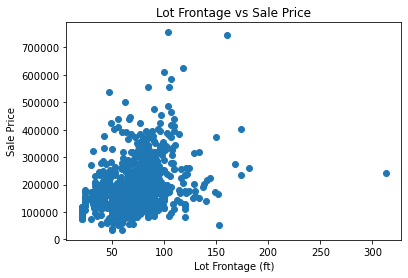

In [22]:
plot_scatter(df,'LotFrontage', 'SalePrice', 'Lot Frontage (ft)', 'Lot Frontage vs Sale Price')

Note: Seems like there is a outlier where the Lot Frontage is extremely high but the price does not seem to rise in accordance; needs to be further investigated

In [23]:
df['LotFrontage'].describe()

count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [24]:
# Remove the outlier in Lot Frontage and assess its impact 
df[df['LotFrontage'] < 300]['LotFrontage'].describe()

count    1198.000000
mean       69.594324
std        22.122293
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       182.000000
Name: LotFrontage, dtype: float64

In [25]:
df[df['LotFrontage'] > 300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2,505,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000


In [26]:
df[df['MSSubClass'] == 20].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,536.0,437.000000,536.000000,536.000000,536.000000,536.000000,536.000000,532.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.0,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,521.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,20.0,77.464531,11755.509328,6.033582,5.550373,1977.960821,1985.878731,104.355263,562.986940,71.958955,623.236940,1258.182836,1346.296642,1.671642,0.0,1347.968284,0.514925,0.059701,1.462687,0.154851,2.731343,1.001866,6.044776,0.587687,1980.243762,1.824627,504.804104,98.014925,42.811567,12.345149,5.246269,15.632463,1.208955,53.514925,6.244403,2007.875000,185224.811567
std,0.0,21.469132,11402.846394,1.440013,1.038187,20.868174,20.140493,162.165941,468.923605,200.204097,509.908687,442.658021,385.560017,38.701305,0.0,386.483549,0.511331,0.237154,0.517459,0.362100,0.538800,0.043193,1.168852,0.655500,20.320321,0.725394,207.066500,130.390154,60.107567,46.449151,39.250489,54.958108,27.989337,688.423356,2.772692,1.345553,78782.189967
min,20.0,36.000000,3182.000000,1.000000,2.000000,1938.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.0,65.000000,8542.000000,5.000000,5.000000,1959.000000,1966.000000,0.000000,34.500000,0.000000,245.750000,986.250000,1049.500000,0.000000,0.0,1049.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,132500.000000
50%,20.0,75.000000,10000.000000,6.000000,5.000000,1971.000000,1994.000000,0.000000,569.000000,0.000000,463.000000,1214.000000,1286.000000,0.000000,0.0,1290.500000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,492.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159250.000000
75%,20.0,85.000000,12156.250000,7.000000,6.000000,2003.000000,2005.000000,178.500000,896.750000,0.000000,895.750000,1526.250000,1611.000000,0.000000,0.0,1614.500000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,607.000000,180.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,20.0,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1115.000000,2188.000000,1127.000000,2336.000000,3206.000000,3228.000000,896.000000,0.0,3228.000000,2.000000,1.000000,3.000000,1.000000,4.000000,2.000000,11.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,418.000000,291.000000,508.000000,385.000000,648.000000,15500.000000,12.000000,2010.000000,611657.000000


**Note:** Based on investigation of the Lot Frontage outlier, the impact of removing the outlier does not significantly impact the column statistics. Based on other similar house types (MSSubClass = 20, 1-Story houses) however it does not actually seem to be an odd value. Its price is higher than 75% of such types of houses, and even though it was built in 1946, it was re-modelled in 2007 and it has fairly good rating on Kitchen Quality and has Typical/Average rating on the gaarage. 

While it seems odd compared to all the data, when compared to similar types of dwelling, the Sale Price is actually pretty high.

### Lot Area vs Sale Price

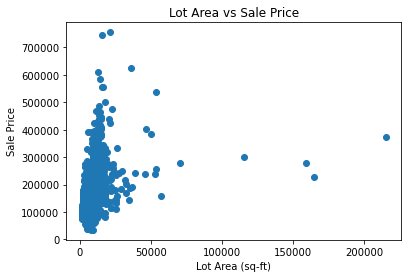

In [27]:
plot_scatter(df,'LotArea', 'SalePrice', 'Lot Area (sq-ft)', 'Lot Area vs Sale Price')

In [28]:
df['LotArea'].describe()

count      1458.000000
mean      10459.936900
std        9859.198156
min        1300.000000
25%        7544.500000
50%        9475.000000
75%       11600.000000
max      215245.000000
Name: LotArea, dtype: float64

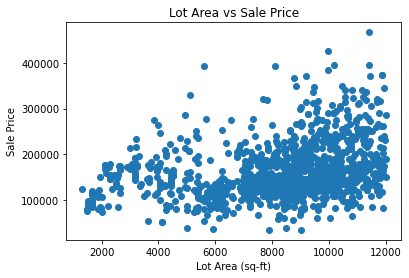

In [29]:
# Investigating Lot Areas up to the 75th Percentile
plot_scatter(df[df['LotArea'] < 12000],'LotArea', 'SalePrice', 'Lot Area (sq-ft)', 'Lot Area vs Sale Price')

Note: Does not seem be any notable relationship/pattern between the Lot Area & Sale Price 

### Masonry Veener Area vs Sale Price

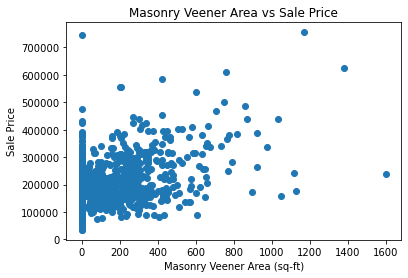

In [30]:
plot_scatter(df,'MasVnrArea', 'SalePrice', 'Masonry Veener Area (sq-ft)', 'Masonry Veener Area vs Sale Price')

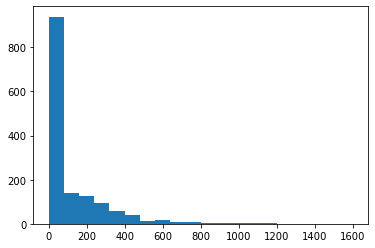

In [31]:
# Histogram of the Masonry area
plt.hist(df['MasVnrArea'], bins=20)
plt.show()

In [32]:
df[df['MasVnrArea'] == 0].shape

(861, 80)

In [33]:
df.shape

(1458, 80)

Note: More than half of the houses have 0 for Masonry Veener area. There does seem to be a trend that as the Masonry Veener area increases, the sale price increases. However, the graph does not show an explicit linear relationship. 

- Overall, this attribute could be a good feature to help determine the final sale price

### Tota Basement Area vs Sale Price

In [34]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


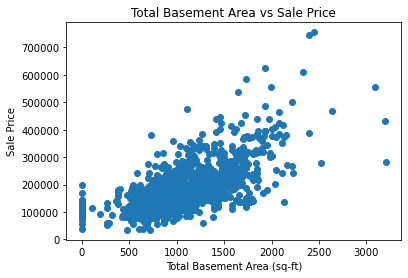

In [35]:
plot_scatter(df,'TotalBsmtSF', 'SalePrice', 'Total Basement Area (sq-ft)', 'Total Basement Area vs Sale Price')

Note: There seems to be a clear relationship between Total Basement Area & Sale Price! Defintely a good feature to be included in the model

### Above Ground Living Area vs Sale Price

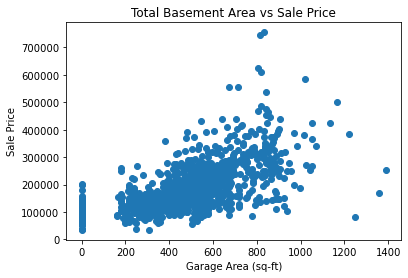

In [36]:
plot_scatter(df,'GarageArea', 'SalePrice', 'Garage Area (sq-ft)', 'Total Basement Area vs Sale Price')

Note: There seems to be a clear relationship between here! Also good to note that when the Garage Area is zero, the prices don't seem to go much above $200,000

In [37]:
### Garage Area vs Sale Price

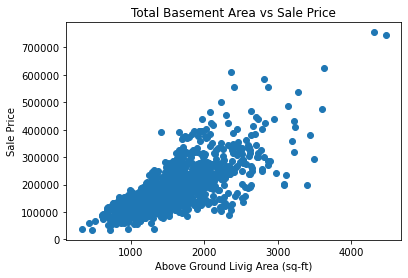

In [38]:
plot_scatter(df,'GrLivArea', 'SalePrice', 'Above Ground Livig Area (sq-ft)', 'Total Basement Area vs Sale Price')

### Year Built vs Sale Price
- Need to keep in mind that some houses may have been re-modeled even if they were built a long time ago! 

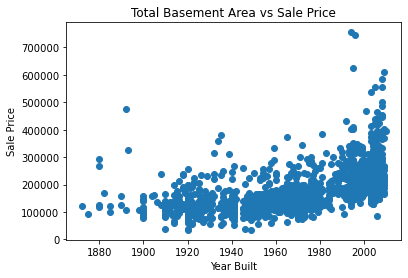

In [39]:
plot_scatter(df,'YearBuilt', 'SalePrice', 'Year Built', 'Total Basement Area vs Sale Price')

**Note:** Its interesting to see here that sale prices of most houses built prior to 1980 seem to fall below $200,000; however, starting to trend upwards after 1940. This makes sense as over time houses become more in demand (post WW2) and there was an economic boom after wards.

## Categorical Data vs Sale Price

- Exploring relationship between categorical features & the sale price 

### Overall Quality & Condition 
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house

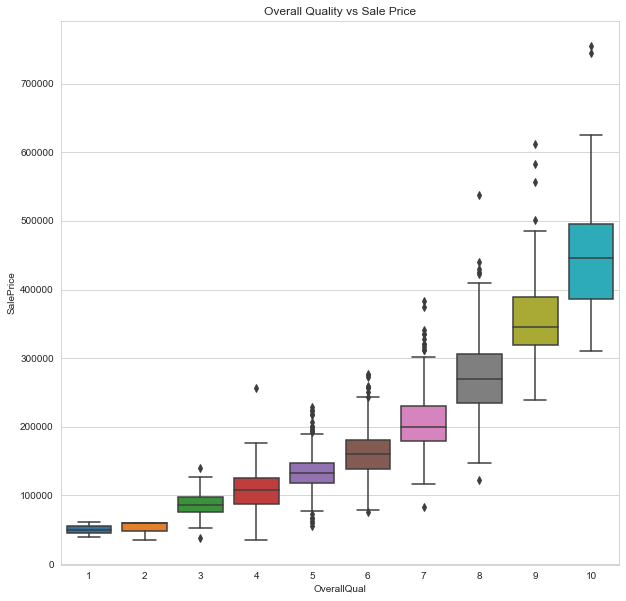

In [98]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df).set_title('Overall Quality vs Sale Price')
plt.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\overallQuality.png")

Note: Clear relationship between the overall quality of the house & the sale price. 
- Would be interesting to see how the quality is quantified; whether its just a realtor rating or some based on some actual assessments

Text(0.5, 1.0, 'Overall Quality vs Sale Price')

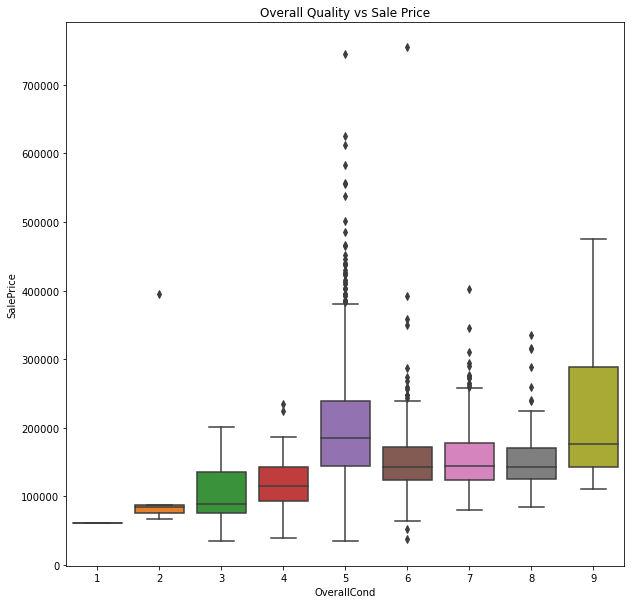

In [41]:
fig, ax = plt.subplots(figsize = (10,10))
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df).set_title('Overall Quality vs Sale Price')

**Note:** While there is an overall trend thata as the overall condition increases, the sale price increases; there is a lot of variation. Interesting to see that houses labeled as "average" (5) in condition are selling for higher prices than houses in better condition. This could definetly be due to a lot of reasons:
- How close the houses are to key locations
- Potential re-modeling of the average house and reselling for higher prices

In [42]:
df[df['OverallCond'] == 5].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,819.000000,682.000000,819.000000,819.000000,819.0,819.000000,819.000000,813.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,792.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,59.957265,71.158358,10509.211233,6.587302,5.0,1987.509158,1990.085470,135.943419,475.634921,35.693529,637.481074,1148.809524,1218.699634,368.188034,2.775336,1589.663004,0.460317,0.032967,1.741148,0.438339,2.853480,1.046398,6.684982,0.656899,1989.804293,2.014652,529.028083,103.832723,54.261294,12.156288,3.343101,11.241758,1.311355,26.805861,6.379731,2007.758242,203222.059829
std,43.006276,23.143392,9796.047339,1.351676,0.0,22.993958,18.900978,200.349791,474.674118,150.700524,491.488633,437.911765,384.954435,460.642767,33.239934,479.799075,0.522665,0.191857,0.498314,0.515809,0.793015,0.227232,1.598718,0.614205,20.104112,0.684998,200.522143,121.030670,62.098471,45.685033,31.577254,48.643131,26.535431,335.007974,2.731440,1.340607,85205.496493
min,20.000000,21.000000,1596.000000,2.000000,5.0,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7844.500000,6.000000,5.0,1972.000000,1976.000000,0.000000,0.000000,0.000000,252.000000,862.500000,917.000000,0.000000,0.000000,1248.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,6.000000,0.000000,1977.000000,2.000000,421.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,143950.000000
50%,60.000000,70.000000,9600.000000,7.000000,5.0,1998.000000,1999.000000,36.000000,417.000000,0.000000,533.000000,1094.000000,1158.000000,0.000000,0.000000,1555.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,2.000000,513.000000,100.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,185500.000000
75%,80.000000,84.000000,11817.000000,7.000000,5.0,2005.000000,2005.000000,212.000000,812.000000,0.000000,935.500000,1436.000000,1494.000000,793.000000,0.000000,1838.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,642.000000,175.500000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,239742.500000
max,190.000000,182.000000,215245.000000,10.000000,5.0,2009.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,514.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,523.000000,291.000000,508.000000,440.000000,555.000000,8300.000000,12.000000,2010.000000,745000.000000


In [43]:
df[(df['OverallCond'] == 6) | (df['OverallCond'] == 7) | (df['OverallCond'] == 8)].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,529.000000,431.000000,529.000000,529.000000,529.000000,529.000000,529.000000,528.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,492.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,51.190926,67.709977,10349.463138,5.550095,6.659735,1951.913043,1979.718336,61.420455,411.412098,63.807183,457.455577,932.674858,1072.134216,310.158790,8.291115,1390.584121,0.383743,0.085066,1.332703,0.315690,2.863894,1.026465,6.224953,0.557656,1963.432927,1.453686,399.223062,84.637051,35.139887,33.168242,3.584121,20.198488,3.708885,71.134216,6.226843,2007.892250,155812.988658
std,39.541638,22.321371,10597.538260,0.970124,0.705434,24.705539,20.372155,139.485383,360.664118,176.950656,327.461914,322.677283,326.663782,389.052931,55.921061,497.374761,0.505837,0.279244,0.506481,0.477287,0.786005,0.160666,1.516469,0.663570,21.719785,0.661603,187.130888,130.626523,63.756516,71.983479,26.828175,62.964158,49.410295,701.568750,2.607092,1.296015,56840.989833
min,20.000000,21.000000,1300.000000,3.000000,6.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.000000,0.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,20.000000,56.500000,7200.000000,5.000000,6.000000,1931.000000,1960.000000,0.000000,0.000000,0.000000,192.000000,742.000000,855.000000,0.000000,0.000000,1040.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1951.000000,1.000000,280.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,124500.000000
50%,50.000000,65.000000,9142.000000,5.000000,7.000000,1957.000000,1980.000000,0.000000,392.000000,0.000000,413.000000,894.000000,1008.000000,0.000000,0.000000,1302.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1965.000000,2.000000,416.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,143750.000000
75%,60.000000,79.000000,11241.000000,6.000000,7.000000,1971.000000,1999.000000,45.250000,637.000000,0.000000,686.000000,1092.000000,1214.000000,668.000000,0.000000,1656.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1977.000000,2.000000,528.000000,160.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,175000.000000
max,190.000000,313.000000,164660.000000,10.000000,8.000000,2007.000000,2010.000000,1170.000000,1880.000000,1080.000000,1689.000000,2444.000000,2898.000000,1872.000000,528.000000,4316.000000,2.000000,1.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2008.000000,4.000000,954.000000,736.000000,547.000000,386.000000,290.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Note:** Seems like the houses that are in average condition seem to offer more area, such as Lot Frontage, Lot Area, Garage Area and Basement Total Area. People seem to be willing to pay higher prices for more area even if the overall condition is lower 

## Categeorical Data vs Sale Price
- Draw some insights by shifting through the categorical data
- Relationships between characteristics like Zoning, Neighbourhood, House Style, Kitchen Quality, and Sale Type
    - The attributes listed above are some key things from a *personal* perspective, I may look for when buying a house

In [44]:
def categorical_analysis(x_var, y_var, dataframe):
    
    print('Count of Records\n')
    print(dataframe[x_var].value_counts())
    print('\nAverage Sale Price\n')
    print(dataframe.groupby(x_var)[y_var].mean())
    print('\n')
    
    # Violin Plot
    plt.figure(figsize=(12,8))
    sns.violinplot(x= x_var, y = y_var, data = dataframe)

### Sale Price Based on Zoning

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Count of Records

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Average Sale Price

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191037.422977
RM         126316.830275
Name: SalePrice, dtype: float64




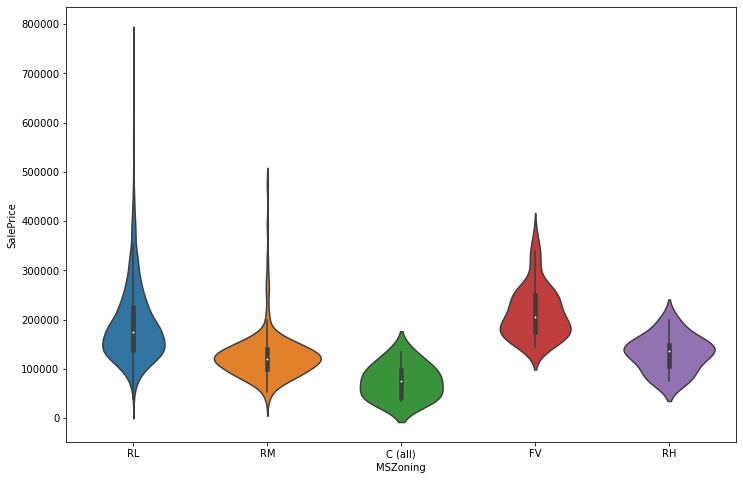

In [45]:
categorical_analysis('MSZoning', 'SalePrice', df)

Note: Most houses sold were classified as being in Residential Low/Medium Density zones. On average, seems like houses classfied in the Floating Village Residential zones are solid for higher prices. 

### Sale Price Based on Neighbourhood

In [46]:
nh_prices = df.groupby('Neighborhood')['SalePrice'].agg(['count','mean']).reset_index()

In [47]:
nh_prices.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)
print(nh_prices)

   Neighborhood  count           mean
0         NAmes    225  145847.080000
1       CollgCr    150  197965.773333
2       OldTown    113  128225.300885
3       Edwards     98  127318.571429
4       Somerst     86  225379.837209
5       Gilbert     79  192854.506329
6       NridgHt     77  316270.623377
7        Sawyer     74  136793.135135
8        NWAmes     73  189050.068493
9       SawyerW     59  186555.796610
10      BrkSide     58  124834.051724
11      Crawfor     51  210624.725490
12      Mitchel     49  156270.122449
13      NoRidge     41  335295.317073
14       Timber     38  242247.447368
15       IDOTRR     37  100123.783784
16      ClearCr     28  212565.428571
17      StoneBr     25  310499.000000
18        SWISU     25  142591.360000
19      Blmngtn     17  194870.882353
20      MeadowV     17   98576.470588
21       BrDale     16  104493.750000
22      Veenker     11  238772.727273
23      NPkVill      9  142694.444444
24      Blueste      2  137500.000000


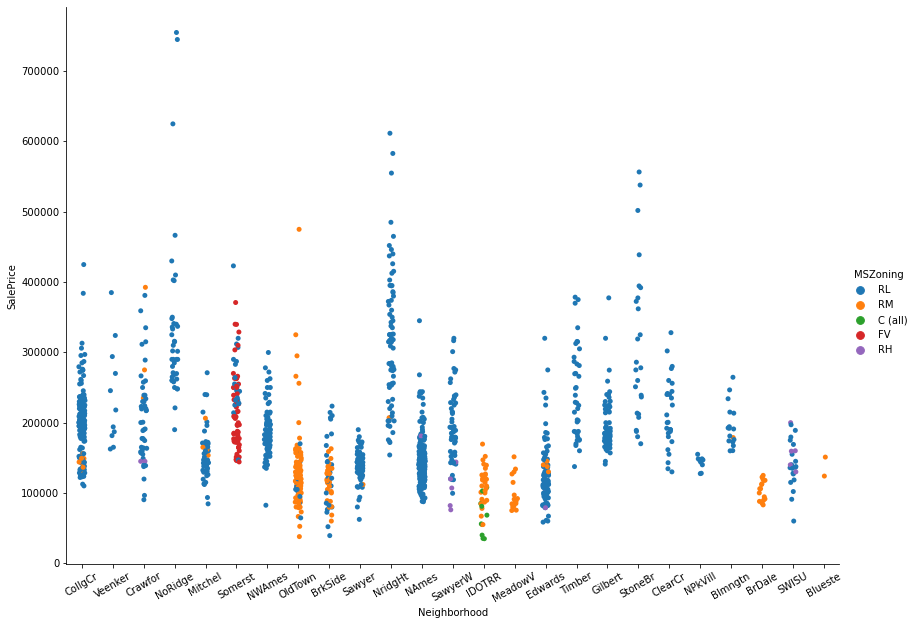

In [48]:
fig_nh_prices = sns.catplot(x='Neighborhood', y='SalePrice', hue='MSZoning', height=8.27, aspect=11.7/8.27, data=df)
fig_nh_prices.set_xticklabels(rotation=30)

**Note:**
- Most of the houses sold in Somerst are Floating Village Residentail 
- There is a lot of variation in house prices in most neighbourhoods, but Northridge and Northridge Heights have a wide range of prices
- Houses that are classified as Residential Medium Density seem all have pretty stable-consistent sale prices

### Sale Price Based on House Style

Count of Records

1Story    726
2Story    443
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Average Sale Price

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210221.862302
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64




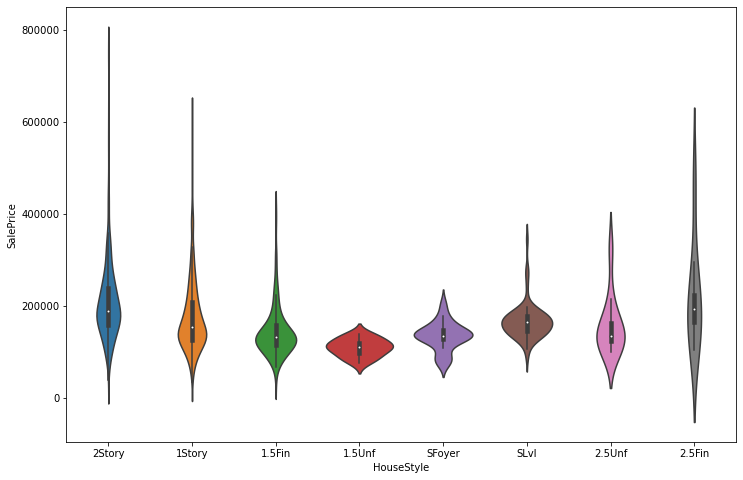

In [49]:
categorical_analysis('HouseStyle', 'SalePrice', df)

**Note:**
- One and one-half story: 2nd level unfinished (1.5Unf), Split Foyer, and Split Level houses have pretty consistent prices 
    - However, it is key to not that in comparison to the top 3 house types sold, the sample size for 1.5Unf, Split Foyer, and Split Level houses are pretty low 

### Sales Price by Kitchen Quality

Count of Records

TA    735
Gd    586
Ex     98
Fa     39
Name: KitchenQual, dtype: int64

Average Sale Price

KitchenQual
Ex    331742.010204
Fa    105565.205128
Gd    212116.023891
TA    139962.511565
Name: SalePrice, dtype: float64




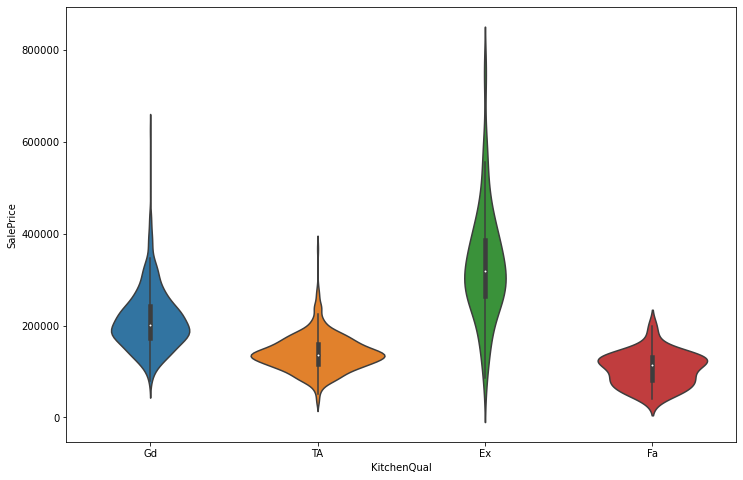

In [50]:
categorical_analysis('KitchenQual', 'SalePrice', df)

**Note:**
- Most houses are in Typical/Averagec condition
- While few, the houses that are only have *Fair* Kitchen Quality seem to be selling for less. From a personal perspective, this makes sense as kitchen quality can definetly be a huge deal when selling houses
- For houses that have Excellent Kitchen Quality seem to have a better chance of selling for higher-prices 
    - Obviously this is just an observation and not a definite fact as tons of factors go into this (as notable throughout this analysis) 

### Sale Price by Sale Condition

Count of Records

Normal     1198
Partial     123
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

Average Sale Price

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    273916.414634
Name: SalePrice, dtype: float64




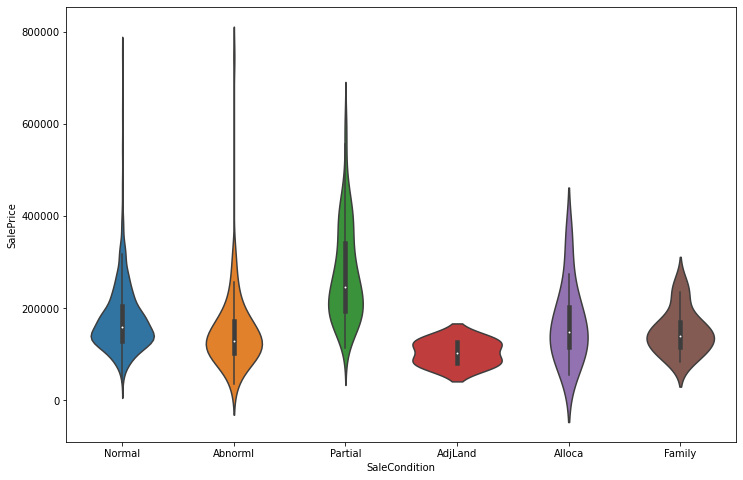

In [51]:
categorical_analysis('SaleCondition', 'SalePrice', df)

**Note:**
- There does not seem to be any key relationship between Sale Condition and Sale Price
- While it makes, its still interesting to see that when the sale is between *family members*, the prices stay relatively average don't fly up

## Sale Price Correlation

In [52]:
corr = df.corr()
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.405399,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.022785,-0.074434,-0.065624,-0.140810,-0.253194,-0.262529,0.308672,0.046486,0.076778,0.003294,-0.002308,0.131773,0.177415,-0.023455,0.281752,0.040335,-0.046009,0.084992,-0.040248,-0.099790,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.405399,1.000000,0.388580,0.235266,-0.056437,0.116552,0.081427,0.163938,0.146986,0.055306,0.139980,0.322824,0.406946,0.066185,0.041701,0.355459,0.076826,-0.005051,0.196322,0.042378,0.273832,-0.003934,0.336210,0.245636,0.060709,0.293489,0.322919,0.081603,0.116992,0.015230,0.074539,0.046278,0.116320,0.004992,0.026139,0.007813,0.370584
LotArea,-0.142033,0.388580,1.000000,0.091392,-0.002723,0.007462,0.007500,0.084529,0.175320,0.114297,-0.003251,0.223914,0.269234,0.041026,0.005536,0.232927,0.147189,0.050068,0.119679,0.007363,0.120311,-0.016796,0.175425,0.261176,-0.032333,0.152484,0.163680,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,-0.058324,0.308990,0.538595,0.469092,0.290052,-0.030129,0.589414,0.104020,-0.039435,0.548420,0.270466,0.101601,-0.184077,0.420621,0.392472,0.546673,0.600741,0.557230,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,-0.059275,-0.056437,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.126669,-0.042987,0.040034,-0.136723,-0.174931,-0.144717,0.030504,0.025414,-0.077423,-0.053674,0.117676,-0.193473,-0.059971,0.013099,-0.087170,-0.055782,-0.022406,-0.323776,-0.185275,-0.150503,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948


In [53]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
YearBuilt        0.523608
YearRemodAdd     0.507717
GarageYrBlt      0.487156
MasVnrArea       0.482719
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.370584
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
YrSold          -0.028882
OverallCond     -0.077948
MSSubClass      -0.084276
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

**Note:** As per our previous analysis through the individual graphs, the correlation data supports our understanding that the **Overall Quality** & **Living Area** play a *big role* in determining the sale price of a house.

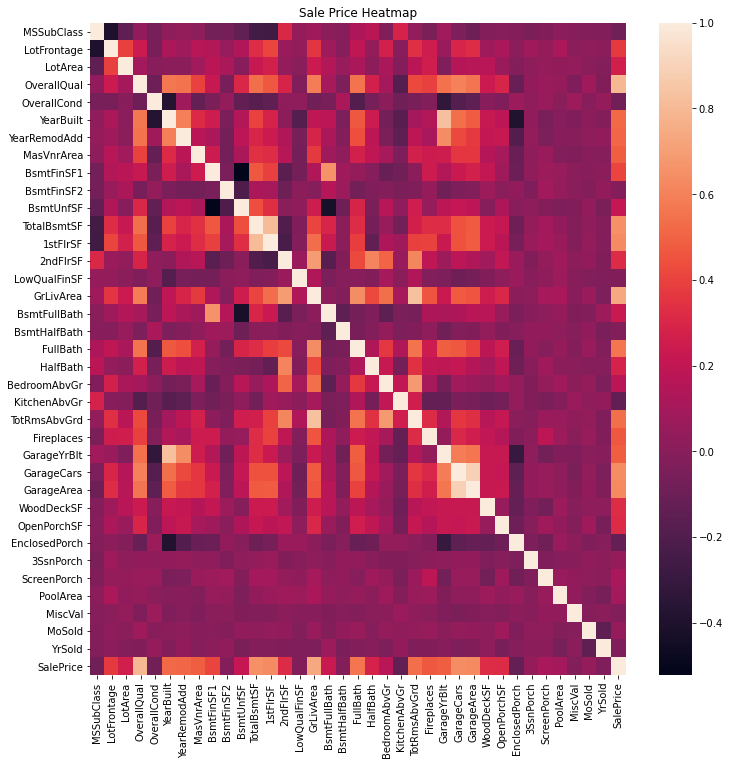

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns)
plt.title('Sale Price Heatmap')
plt.show()

**Note:** We can also see that the Garage Area, Garage Cars (size of garage in cars), and Total Basement area are positively correlated with the sale price. 
- This makes sense as those are pretty typical, but big factors that people would look for when buying a house 
- A bigger basement can create renting opportunities
- Large garags can accomodate more storage space and ability to re-model for other uses (ex: home gym)

## Multicollinearity
- Multicollinearity is when there is a strong correlation between independent variables
- This has a big impact when using regression models 
- It may not be as big of a problem if leveraging other types of models, but since this focus on this project is learn more about regression models, Multicollinearity will be taken more seriously

In [55]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [57]:
# Isolate the numeric features
df_numeric = df.select_dtypes(include = np.number)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [58]:
# Lot Frontage, Masonary Vnr Area, & Garage Year Built have NULL (NaNs) so they will be dropped
df_numeric.drop(['LotFrontage','GarageYrBlt', 'MasVnrArea'], inplace=True, axis=1)

C:\Users\shakt\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
# Add a constant of ones at the end of the dataframe
# Python's OLS algorithm does not add an intercept by default. The author the function's author, variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables. One can use add_constant from statsmodels to add the required constant to the dataframe before passing its values to the function.
df_numeric = add_constant(df_numeric)

In [60]:
vif = pd.DataFrame()
vif['Variables'] = df_numeric.columns
vif['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

C:\Users\shakt\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [61]:
print(vif)

        Variables           VIF
0           const  2.411224e+06
1      MSSubClass  1.525344e+00
2         LotArea  1.226347e+00
3     OverallQual  3.743507e+00
4     OverallCond  1.597754e+00
5       YearBuilt  4.196220e+00
6    YearRemodAdd  2.231058e+00
7      BsmtFinSF1           inf
8      BsmtFinSF2           inf
9       BsmtUnfSF           inf
10    TotalBsmtSF           inf
11       1stFlrSF           inf
12       2ndFlrSF           inf
13   LowQualFinSF           inf
14      GrLivArea           inf
15   BsmtFullBath  2.259823e+00
16   BsmtHalfBath  1.155725e+00
17       FullBath  2.918672e+00
18       HalfBath  2.164224e+00
19   BedroomAbvGr  2.455779e+00
20   KitchenAbvGr  1.596131e+00
21   TotRmsAbvGrd  4.875843e+00
22     Fireplaces  1.564499e+00
23     GarageCars  5.638021e+00
24     GarageArea  5.208464e+00
25     WoodDeckSF  1.213266e+00
26    OpenPorchSF  1.191032e+00
27  EnclosedPorch  1.282471e+00
28      3SsnPorch  1.021892e+00
29    ScreenPorch  1.117979e+00
30      

**Note:** The **inf** values from the VIF output indicates perfect correlation between the variables.
This makes sense as TotalBsmtSF is a sum of the total square feet of the basement area. 
- To account for this, only the TotalBsmtSF will be retained and the rest of the variables relating to the basement surface area will be dropped

In [62]:
# Only TotalBsmtSF will be retained and the rest of the variables relating to the basement surface area will be dropped
df_numeric.drop(['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF'], inplace=True, axis=1)

In [63]:
# Re-run the VIF function
vif2 = pd.DataFrame()
vif2['Variables'] = df_numeric.columns
vif2['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
print(vif2)

C:\Users\shakt\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


        Variables           VIF
0           const  2.409044e+06
1      MSSubClass  1.523699e+00
2         LotArea  1.218863e+00
3     OverallQual  3.675409e+00
4     OverallCond  1.585561e+00
5       YearBuilt  4.189460e+00
6    YearRemodAdd  2.182257e+00
7     TotalBsmtSF  3.765400e+00
8        1stFlrSF           inf
9        2ndFlrSF           inf
10   LowQualFinSF           inf
11      GrLivArea           inf
12   BsmtFullBath  1.350769e+00
13   BsmtHalfBath  1.079495e+00
14       FullBath  2.917014e+00
15       HalfBath  2.155772e+00
16   BedroomAbvGr  2.454001e+00
17   KitchenAbvGr  1.592349e+00
18   TotRmsAbvGrd  4.847098e+00
19     Fireplaces  1.559837e+00
20     GarageCars  5.623537e+00
21     GarageArea  5.200723e+00
22     WoodDeckSF  1.210235e+00
23    OpenPorchSF  1.187705e+00
24  EnclosedPorch  1.278625e+00
25      3SsnPorch  1.020815e+00
26    ScreenPorch  1.111182e+00
27       PoolArea  1.050367e+00
28        MiscVal  1.022469e+00
29         MoSold  1.046439e+00
30      

**Note:** 1stFlrSF, 2ndFlrSF, LowQualFinSF, and GrLivArea are all highly correlated. 
- At first, the affect of *dropping the First Floor SF & Second Floor SF* will be assed 

In [64]:
# Only TotalBsmtSF will be retained and the rest of the variables relating to the basement surface area will be dropped
df_numeric.drop(['1stFlrSF','2ndFlrSF'], inplace=True, axis=1)

In [65]:
# Re-run the VIF function
vif3 = pd.DataFrame()
vif3['Variables'] = df_numeric.columns
vif3['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
print(vif3)

        Variables           VIF
0           const  2.409038e+06
1      MSSubClass  1.438049e+00
2         LotArea  1.217883e+00
3     OverallQual  3.660828e+00
4     OverallCond  1.585293e+00
5       YearBuilt  4.160994e+00
6    YearRemodAdd  2.182138e+00
7     TotalBsmtSF  2.403513e+00
8    LowQualFinSF  1.124693e+00
9       GrLivArea  8.207174e+00
10   BsmtFullBath  1.349941e+00
11   BsmtHalfBath  1.078853e+00
12       FullBath  2.887542e+00
13       HalfBath  1.803028e+00
14   BedroomAbvGr  2.407778e+00
15   KitchenAbvGr  1.519176e+00
16   TotRmsAbvGrd  4.846837e+00
17     Fireplaces  1.519995e+00
18     GarageCars  5.623481e+00
19     GarageArea  5.193823e+00
20     WoodDeckSF  1.209612e+00
21    OpenPorchSF  1.186047e+00
22  EnclosedPorch  1.276401e+00
23      3SsnPorch  1.019007e+00
24    ScreenPorch  1.110637e+00
25       PoolArea  1.050341e+00
26        MiscVal  1.020967e+00
27         MoSold  1.046340e+00
28         YrSold  1.050908e+00
29      SalePrice  6.862792e+00


**Note:** The VIF has dropped off from inf to 8.2 for GrLivArea after removing the 1stFlrSF, 2ndFlrSF variables. This makes sense as the GrLivArea would include the surface area of the 1st & 2nd floor. 
- LowQualFinSF includes *all floors* and the VIF is relatively low, so it will not be dropped off
- GrLivArea still has a pretty high VIF output, so this will need to be investigated further

-> Based on the heatmap above, GrLivArea would also be related to metrics related to Garage size and total rooms. However, since these could be real factors that impact the sale price of a house, so they will not be removed. 

## Missing Data

In [66]:
nullVals.sort_values()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

**Note:** There is a mix of ordinal and categorical data that needs to be transformed. For ordinal data, a NULL value can represent a value of 0 (example: PoolQC with a NA means there is no pool)

- PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType1, BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, MasVnrType *all have NA meaning that the particular house 'feature' does not exist. The NAs do not represent true missing values*
- All the NAs for these attributes will be replaced with 'None'
- For the numerical columns, like GarageYrBlt & MasVnrArea, 0 will be imputed for those values to represent no garage or masonry veneer
- For Electrical, there is only 1 null value, so for this one, it will be imputed with the most common value of SBrkr. The impact of this should be fairly minimal even if it is wrong
- Lot Frontage needs to be further investigated

In [67]:
df['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [68]:
df['Electrical'].isnull().sum()

1

In [69]:
df[df['Electrical'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [70]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

### Imputing Missing Values (NA -> 'None')

In [71]:
# Get all the categorical columns that have null values (ensure they align with the findings above)
nullVals_cat = df[df.columns[df.dtypes == 'object']].isnull().sum()*100/len(df)
nullVals_cat = nullVals_cat.where(nullVals != 0).dropna()
print(nullVals_cat)
null_cat = list(nullVals_cat.index)

Alley           93.758573
MasVnrType       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtExposure     2.606310
BsmtFinType1     2.537723
BsmtFinType2     2.606310
Electrical       0.068587
FireplaceQu     47.325103
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
PoolQC          99.588477
Fence           80.727023
MiscFeature     96.296296
dtype: float64


In [72]:
null_cat.remove('Electrical')
print(null_cat)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [73]:
df[null_cat] = df[null_cat].fillna('None')

In [74]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [75]:
df[['GarageYrBlt', 'MasVnrArea']] = df[['GarageYrBlt', 'MasVnrArea']].fillna(0)

In [76]:
null_test = df.isnull().sum()*100/len(df)
null_test = null_test.where(null_test != 0).dropna()
null_test

LotFrontage    17.76406
dtype: float64

### Lot Frontage

In [77]:
def custom_figsize():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)

In [78]:
df['LotFrontage'].describe()

count    1199.000000
mean       69.797331
std        23.203458
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [79]:
df['LotFrontage'].median()

69.0

In [81]:
df.groupby('Neighborhood')['LotFrontage'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,14.0,47.142857,4.990100,43.0,43.00,43.0,53.00,53.0
Blueste,2.0,24.000000,0.000000,24.0,24.00,24.0,24.00,24.0
BrDale,16.0,21.562500,1.209339,21.0,21.00,21.0,21.00,24.0
BrkSide,51.0,57.509804,15.528519,50.0,50.00,52.0,60.00,144.0
ClearCr,13.0,83.461538,18.875096,62.0,75.00,80.0,83.00,138.0
CollgCr,126.0,71.682540,16.359291,36.0,64.00,70.0,78.00,122.0
Crawfor,41.0,71.804878,19.436074,40.0,55.00,74.0,82.00,130.0
Edwards,90.0,64.811111,18.643850,24.0,58.25,64.5,73.75,134.0
Gilbert,49.0,79.877551,32.748176,42.0,60.00,65.0,93.00,182.0


C:\Users\shakt\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


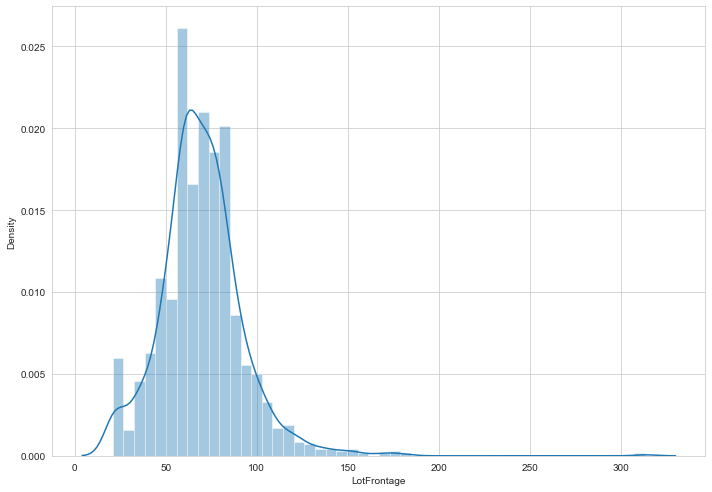

In [83]:
# Lot Frontage Histogram
sns.set_style("whitegrid")
custom_figsize()
lf_dist = sns.distplot(df['LotFrontage'])
lf_dist.figure.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\lot_frontage_distribution.png")

C:\Users\shakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


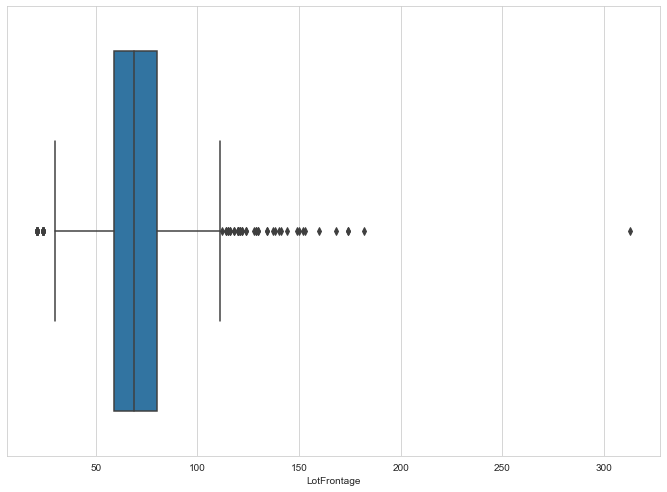

In [84]:
# Boxplot
custom_figsize()
lf_box = sns.boxplot(df['LotFrontage'])
lf_box.figure.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\lot_frontage_boxplot.png")

- There are a lot of outliers in the lot-frontage values, both on the low & high ends of the values 

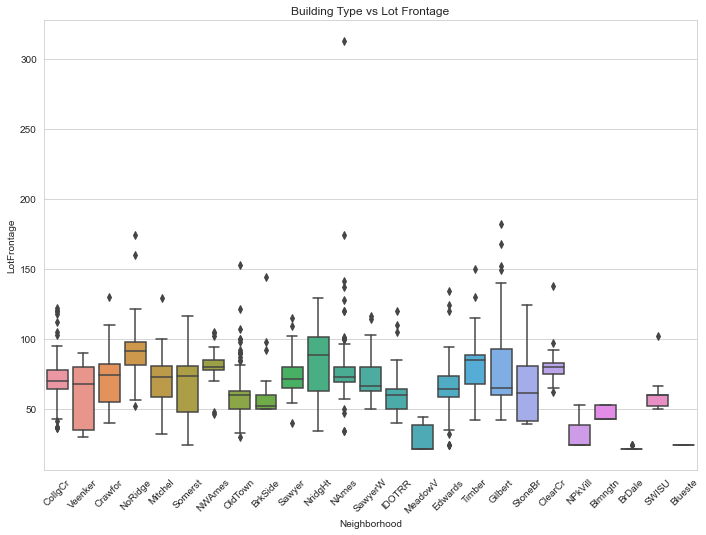

In [101]:
custom_figsize()

lf_bldng = sns.boxplot(x = "Neighborhood", y = 'LotFrontage', data = df).set_title('Building Type vs Lot Frontage')
plt.xticks(rotation=45)
plt.savefig(r"C:\Users\shakt\Documents\Data Science Projects\House-Price-Modelling\Reports\Figures\neighborhood_lot_frontage.png")
plt.show()

**Note**
- The 'Neighborhood' can be a good assessment of what the Lot Frontage values can be as houses in the same area would tend to have similar designs & area on average 
    - However, there are a lot of outliers for the different Neighborhoods and so the *median values* will be used to impute the missing Lot Frontage values

### Label Encoding
- Since there are many categorical features, they will have to be encoded into numbers so that we can use them in our model
- Ordinal & Nomial features will have to be encoded differently, as with ordinal values the order matters

In [93]:
#from sklearn.preprocessing import OrdinalEncoder